In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


**Output variable** -> y


**y** -> Whether the client has subscribed a term deposit or not 
Binomial ("*yes*" or "*no*")

In [213]:
bank=pd.read_csv('/content/bank-full[1].csv',sep=';')

In [214]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# **EDA**

In [215]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [216]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [217]:
bank.duplicated().sum()

0

In [218]:
#getting dummy cols for better understanding of dataset
bank1=pd.get_dummies(bank,columns=['job','marital','month','education','contact','poutcome','default','loan','housing'])

In [ ]:
bank1

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,default_no,default_yes,loan_no,loan_yes,housing_no,housing_yes
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,0,1,1,0,1,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,0,1,1,0,1,0,0,1
2,33,2,5,76,1,-1,0,no,0,0,...,0,0,0,1,1,0,0,1,0,1
3,47,1506,5,92,1,-1,0,no,0,1,...,0,0,0,1,1,0,1,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,yes,0,0,...,0,0,0,1,1,0,1,0,1,0
45207,71,1729,17,456,2,-1,0,yes,0,0,...,0,0,0,1,1,0,1,0,1,0
45208,72,5715,17,1127,5,184,3,yes,0,0,...,0,0,1,0,1,0,1,0,1,0
45209,57,668,17,508,4,-1,0,no,0,1,...,0,0,0,1,1,0,1,0,1,0


In [219]:
#converting into binary 
bank1['y'] = np.where(bank1['y'].str.contains("yes"), 1, 0)

In [220]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   y                    45211 non-null  int64
 8   job_admin.           45211 non-null  uint8
 9   job_blue-collar      45211 non-null  uint8
 10  job_entrepreneur     45211 non-null  uint8
 11  job_housemaid        45211 non-null  uint8
 12  job_management       45211 non-null  uint8
 13  job_retired          45211 non-null  uint8
 14  job_self-employed    45211 non-null  uint8
 15  job_services         45211 non-null  uint8
 16  job_student          4

In [221]:
bank1.isna().sum()

age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
y                      0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
month_apr              0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
contact_cellular       0


In [222]:
#independent variable
x=pd.concat([bank1.iloc[:,0:7],bank1.iloc[:,8:]],axis=1)

In [223]:
x

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,default_no,default_yes,loan_no,loan_yes,housing_no,housing_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,1,0,1,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,1,0,1,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,1,1,0,0,1,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,1,1,0,1,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,1,0,1,0,1,0
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,1,0,1,0,1,0
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,1,0,1,0,1,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,1,1,0,1,0,1,0


In [224]:
x.isna().sum()

age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
month_apr              0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
contact_cellular       0
contact_telephone      0


In [225]:
#dependent variable
y=bank1.iloc[:,7]

In [226]:
y.isna().sum()

0

In [227]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [228]:
#fitting mode
classifier=LogisticRegression()
classifier.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [229]:
pred=classifier.predict(x)

In [230]:
pred

array([0, 0, 0, ..., 1, 0, 0])

In [231]:
table=pd.DataFrame({'actual':y,'predicted':pred})
table

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [236]:
confusion_matrix = confusion_matrix(y,pred)
confusion_matrix

array([[39138,   784],
       [ 4109,  1180]])

In [241]:
a=(39138+1180)/(39138+784+4109+1180)


In [243]:
print('accuracy=>',a)

accuracy=> 0.8917741257658535


In [244]:
from sklearn.metrics import classification_report
print(classification_report(y,pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.22      0.33      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



Text(0, 0.5, 'True Positive Rate')

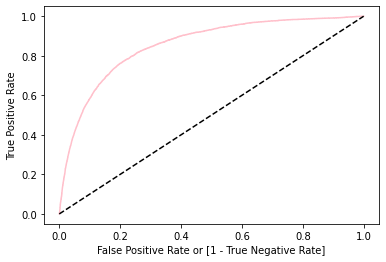

In [245]:
#roc
fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba (x)[:,1])

auc = roc_auc_score(y, pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='pink', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [240]:
auc

0.601733130976173